In [31]:
import numpy as np
import pandas as pd
df = pd.read_csv('Wage.csv')
df.head(3)



,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


# 1. polynomial regression

1. 2D scatter plot Visualize the relationship between age and wage

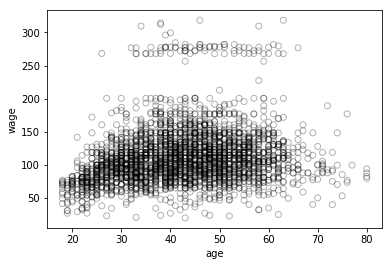

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel("age")
plt.ylabel("wage")
plt.show()

2. fit polynomial regession from degree 1 to degree 5, choose the optimal one

In [38]:

from sklearn.preprocessing import PolynomialFeatures
#Transfer the x_age to new Matrix X
x_age = df.age.values.reshape(-1,1)
X1 = PolynomialFeatures(1).fit_transform(x_age)  #[1,X]
X2 = PolynomialFeatures(2).fit_transform(x_age)  #[1,X,X^2]
X3 = PolynomialFeatures(3).fit_transform(x_age)
X4 = PolynomialFeatures(4).fit_transform(x_age)
X5 = PolynomialFeatures(5).fit_transform(x_age)



import statsmodels.api as sm
# fit the polynomial regression model
degree_4_model = sm.GLS(df.wage, X5).fit()
degree_4_model.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
const,-49.7046,161.435,-0.308,0.758,-366.239,266.830
x1,3.9930,20.110,0.199,0.843,-35.438,43.424
x2,0.2760,0.958,0.288,0.773,-1.603,2.155
x3,-0.0126,0.022,-0.577,0.564,-0.056,0.030
x4,0.0002,0.000,0.762,0.446,-0.000,0.001
x5,-9.157e-07,1.02e-06,-0.897,0.370,-2.92e-06,1.09e-06


In [39]:
fit_1 =  sm.GLS(df.wage, X1).fit()
fit_2 =  sm.GLS(df.wage, X2).fit()
fit_3 =  sm.GLS(df.wage, X3).fit()
fit_4 =  sm.GLS(df.wage, X4).fit()
fit_5 =  sm.GLS(df.wage, X5).fit()

sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1)

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


3. fit the optimal polynomial regession curve on the scatter plot

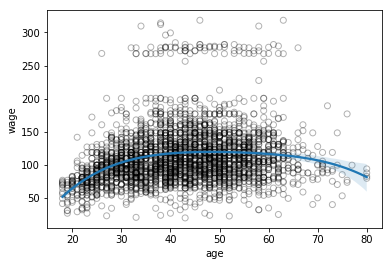

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel("age")
plt.ylabel("wage")
sns.regplot(df.age, df.wage, order = 4, truncate=True, scatter=False)
plt.show()

4. split the data as training set and testing set, find the best d based on lowest test mse.

In [40]:
#Split the data
from sklearn.model_selection import train_test_split
X = x_age
Y = df.wage
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#find the list of test-mse based on different d= [1,2,3,4,5]
d= [1,2,3,4,5]
test_mse = []
for degree in d:
    Xi_train = PolynomialFeatures(degree).fit_transform(X_train)
    Xi_test  = PolynomialFeatures(degree).fit_transform(X_test)
    degree_i_model = sm.GLS(y_train, Xi_train).fit()
    test_mse.append(np.mean(degree_i_model.predict(Xi_test)))

test_mse




[112.0813321441981,
 111.63275686573546,
 111.58458389420193,
 111.59944339653717,
 111.53253517097534]

# 2. logistic polynomial regression

1. let wage=250 as split point, visualize p-value and fit the polynomial logistics regssion curve with degree 4 .

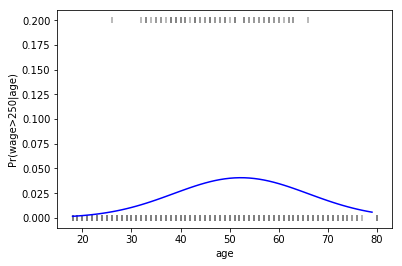

In [47]:
y = (df.wage > 250).map({False:0, True:1}).values

clf = sm.GLM(y, X2, family=sm.families.Binomial(sm.families.links.logit))
res = clf.fit()
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)
X_test = PolynomialFeatures(2).fit_transform(age_grid)
pred = res.predict(X_test)


plt.scatter(df.age, y/5, s=30, c='grey', marker='|', alpha=0.7)
plt.plot(age_grid, pred, color='b')

plt.ylim(-0.01,0.21)
plt.xlabel('age')
plt.ylabel('Pr(wage>250|age)')
plt.show()


In [44]:
age_grid

array([[18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79]])